# Data Preprocessing and Feature Engineering in Machine Learning

## Objective
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. We will work with the provided "Adult" dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

## Dataset
The dataset provided is "Adult", which predicts whether income exceeds $50K/year based on census data.

## Tasks
1. **Data Exploration and Preprocessing:**
   - Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
   - Handle missing values as per the best practices (imputation, removal, etc.).
   - Apply scaling techniques to numerical features:
     - Standard Scaling
     - Min-Max Scaling
   - Discuss the scenarios where each scaling technique is preferred and why.

2. **Encoding Techniques:**
   - Apply One-Hot Encoding to categorical variables with less than 5 categories.
   - Use Label Encoding for categorical variables with more than 5 categories.
   - Discuss the pros and cons of One-Hot Encoding and Label Encoding.

3. **Feature Engineering:**
   - Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
   - Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

4. **Feature Selection:**
   - Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
   - Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


Data Overview:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   Unite

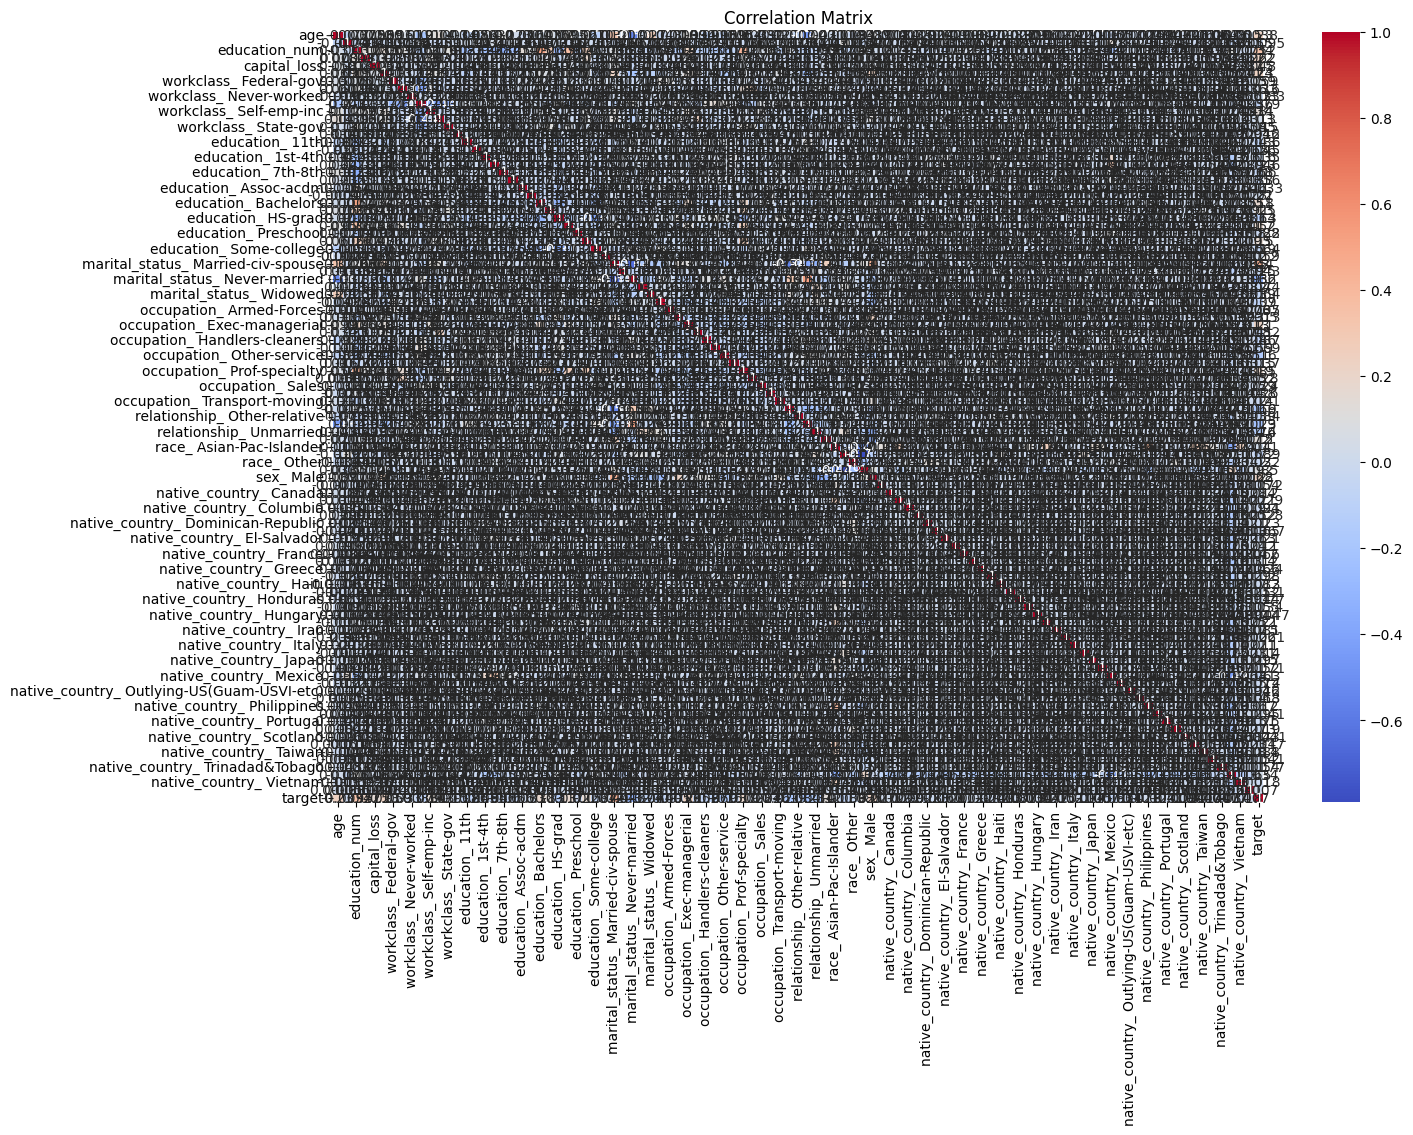

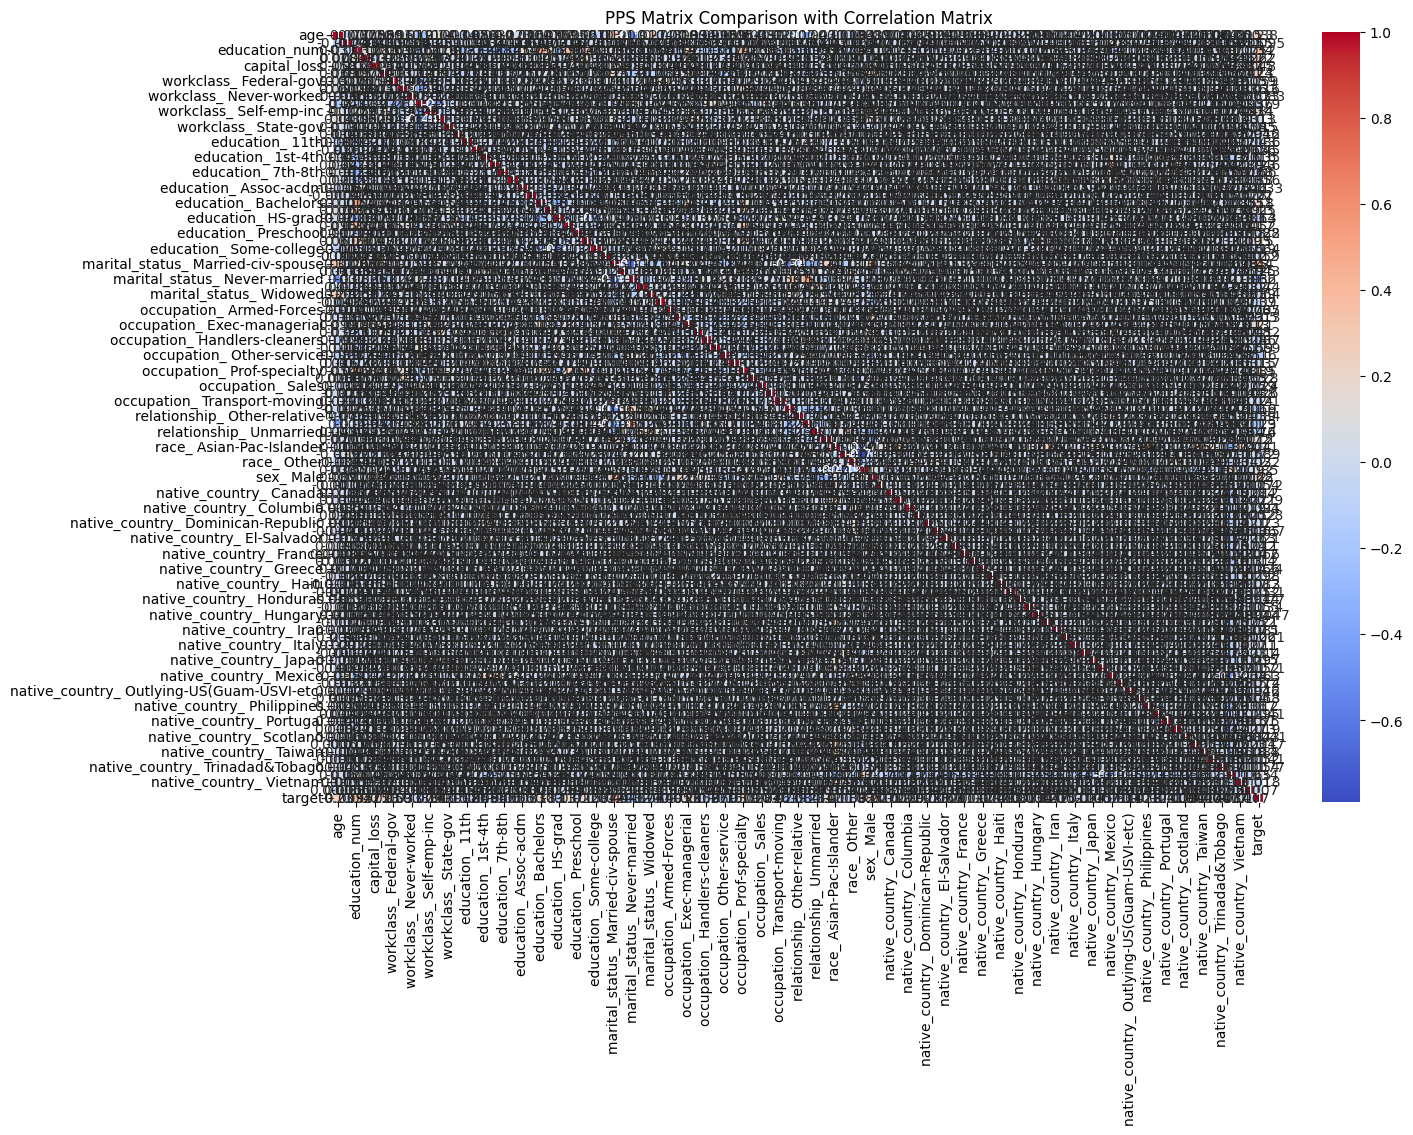

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox

# Load dataset
df = pd.read_csv(r'C:\Users\lenovo\Desktop\Excelr\Data Science\Data Science Projects\Data Science Excel File and Datasets\adult_with_headers.csv')

# Data Exploration
print("Data Overview:")
print(df.head())
print("\nData Summary:")
print(df.describe(include='all'))
print("\nMissing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

# Encoding categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Ensure the target column is encoded properly
if 'income_ >50K' in df_encoded.columns:
    df_encoded.rename(columns={'income_ >50K': 'target'}, inplace=True)
else:
    print("Target column 'income' not found in the encoded DataFrame.")
    print("Available columns:")
    print(df_encoded.columns)
    raise ValueError("Target column not found.")

# Separate features and target
X = df_encoded.drop(columns='target')
y = df_encoded['target']

# Data Preprocessing
# Apply Standard Scaling
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)

# Apply Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)

print("\nData Scaling Completed")

# Label Encoding for binary categorical columns
le = LabelEncoder()
binary_categorical_columns = ['sex', 'race', 'native_country']  # Adjust based on your data
for col in binary_categorical_columns:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

print("\nLabel Encoding Completed")

# Discuss Encoding Techniques
print("\nEncoding Techniques Discussion:")
print("One-Hot Encoding:")
print("- Pros: Handles nominal categories well, avoids ordinal assumptions.")
print("- Cons: Can lead to high dimensionality, which might increase the risk of overfitting.")
print("Label Encoding:")
print("- Pros: Simple and efficient for ordinal categories.")
print("- Cons: Assumes an ordinal relationship between categories, which may not always be true.")

# Feature Engineering
# Create new feature: Ratio of capital gain to hours per week
df['capital_gain_to_hours'] = df['capital_gain'] / (df['hours_per_week'] + 1)  # Adding 1 to avoid division by zero

# Transform skewed numerical features using Box-Cox
numeric_features = df.select_dtypes(include=[np.number]).columns
skewed_features = df[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[skewed_features > 0.75].index

for feature in skewed_features:
    df[feature], _ = boxcox(df[feature] + 1)  # Adding 1 to avoid issues with zero values

print("\nFeature Engineering Completed")

# Feature Selection: Isolation Forest
iso_forest = IsolationForest(contamination=0.01)  # Adjust contamination based on your data
outliers = iso_forest.fit_predict(X)  # -1 for outliers, 1 for inliers

df['outlier'] = outliers
print("\nIsolation Forest Outlier Detection Completed")

# Calculate PPS Scores
def calculate_pps(column_name):
    try:
        score = pps.score(df_encoded, column_name, 'target')
        return score['ppscore']
    except ValueError as e:
        print(f"Error calculating PPS for column {column_name}: {e}")
        return None

# Calculate PPS matrix
pps_matrix = df_encoded.columns.to_series().apply(calculate_pps)

print("\nPPS Matrix:")
print(pps_matrix)

# Correlation Matrix
correlation_matrix = df_encoded.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plotting
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('PPS Matrix Comparison with Correlation Matrix')
plt.show()
